In [3]:
pip install reservoirpy

Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import mackey_glass

In [5]:
series = mackey_glass(2000)

In [6]:
u = series[:-1].reshape(-1, 1)
y = series[1:].reshape(-1, 1)

In [7]:
train_len = 1500
u_train, y_train = u[:train_len], y[:train_len]
u_test,  y_test  = u[train_len:], y[train_len:]

In [8]:
a_reservoir = Reservoir(
    units=300,
    sr=0.9,           
    lr=0.01,          
    input_scaling=0.5,
    seed=42
)
readout = Ridge(ridge=1e-6)

esn = a_reservoir >> readout 

In [9]:
esn.fit(u_train, y_train)

Running Model-0:   0%|          | 0/1 [00:00<?, ?it/s]
Running Model-0: 1500it [00:00, 24384.26it/s]         
Running Model-0: 100%|██████████| 1/1 [00:00<00:00, 14.86it/s]

Fitting node Ridge-0...


'Model-0': Model('Reservoir-0', 'Ridge-0')

In [10]:
y_pred = esn.run(u_test)


Running Model-0: 499it [00:00, 12332.34it/s]          


Test MSE: 4.035862


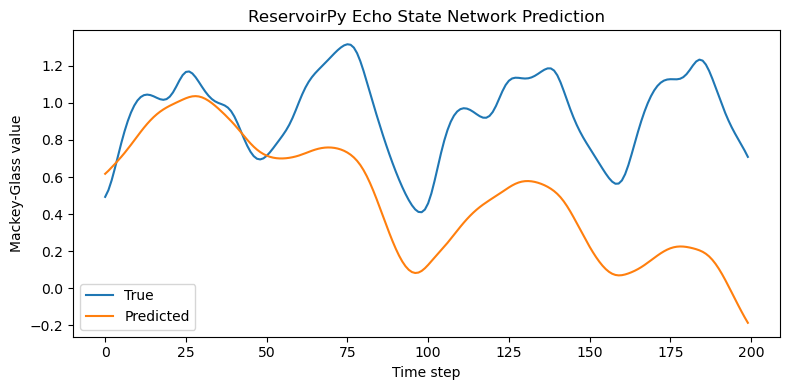

In [11]:
mse = np.mean((y_pred - y_test) ** 2)
print(f"Test MSE: {mse:.6f}")

plt.figure(figsize=(8, 4))
plt.plot(y_test[:200], label="True")
plt.plot(y_pred[:200], label="Predicted")
plt.xlabel("Time step")
plt.ylabel("Mackey‑Glass value")
plt.title("ReservoirPy Echo State Network Prediction")
plt.legend()
plt.tight_layout()
plt.savefig("reservoirpy_mg_prediction.png", dpi=150)
plt.show()